# **CREDIT SCORE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, roc_curve


# **_DATA_**

In [3]:
dataset = pd.read_csv('./Credit_Score.csv')
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# **_Preprocessed Data_**

In [4]:
dataset = dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], axis=1)
dataset.drop_duplicates(inplace=True)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

# **_Statistics Summary_**

In [5]:
print("\nSummary Statistics")
print(dataset.describe())



Summary Statistics
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.532880             21.08141   
std           2.067

# **_Description of Data_**

In [6]:
print(dataset.head)


<bound method NDFrame.head of         Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist       19114.12            1824.843333   
1      23.0  Scientist       19114.12            1824.843333   
2      23.0  Scientist       19114.12            1824.843333   
3      23.0  Scientist       19114.12            1824.843333   
4      23.0  Scientist       19114.12            1824.843333   
...     ...        ...            ...                    ...   
99995  25.0   Mechanic       39628.99            3359.415833   
99996  25.0   Mechanic       39628.99            3359.415833   
99997  25.0   Mechanic       39628.99            3359.415833   
99998  25.0   Mechanic       39628.99            3359.415833   
99999  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.

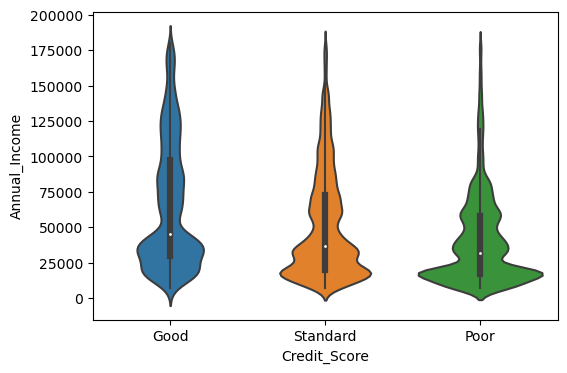

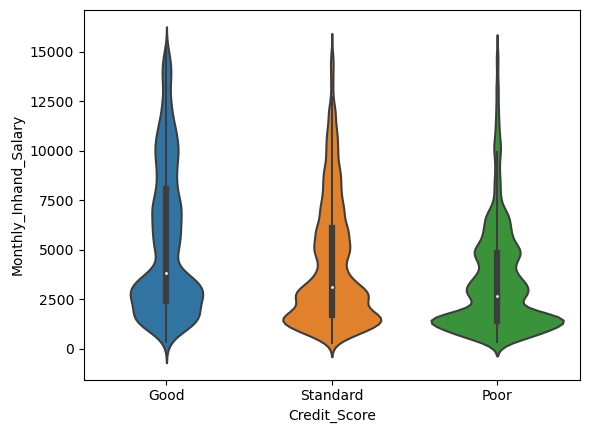

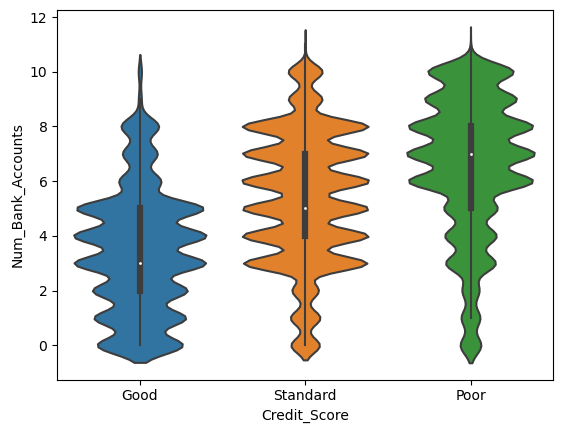

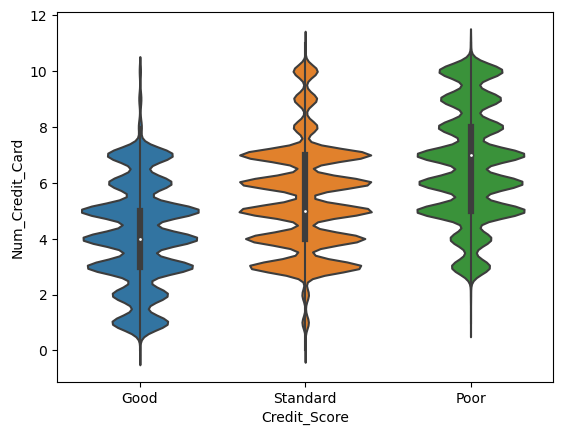

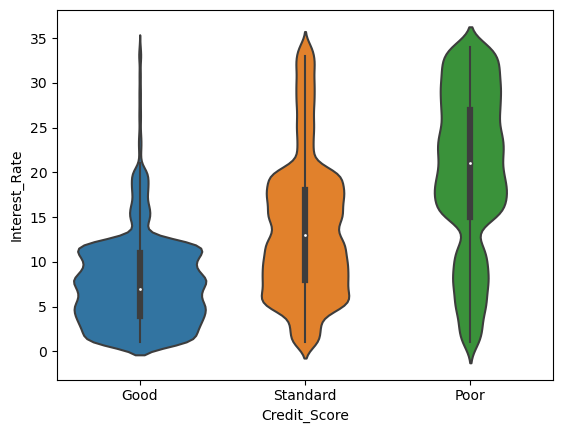

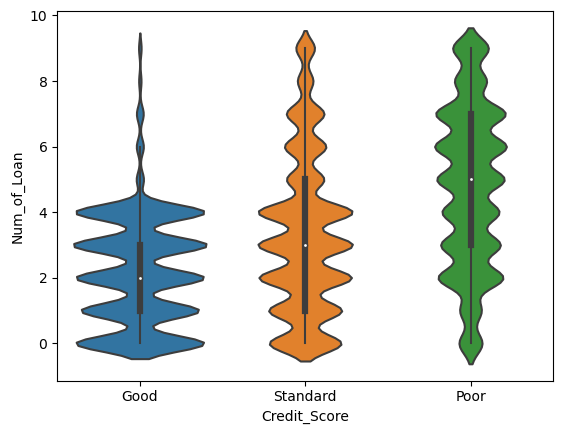

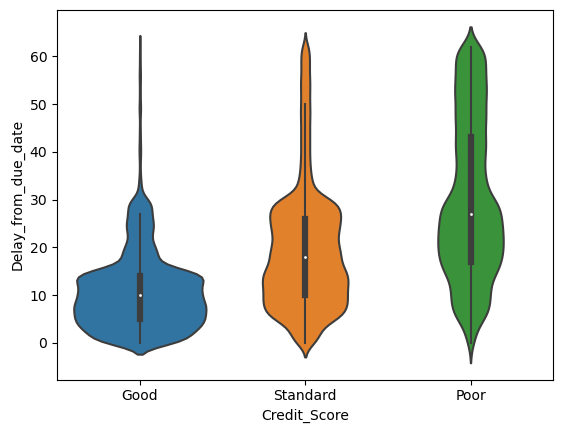

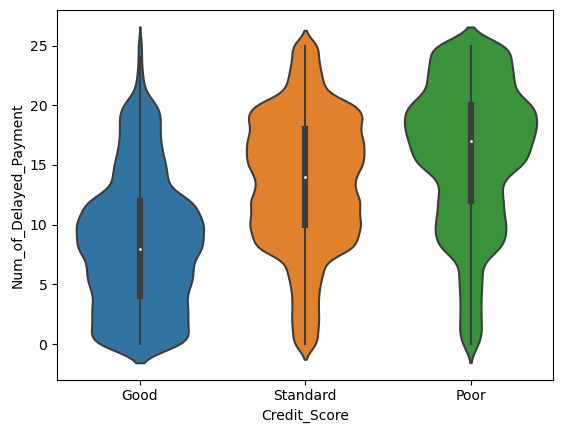

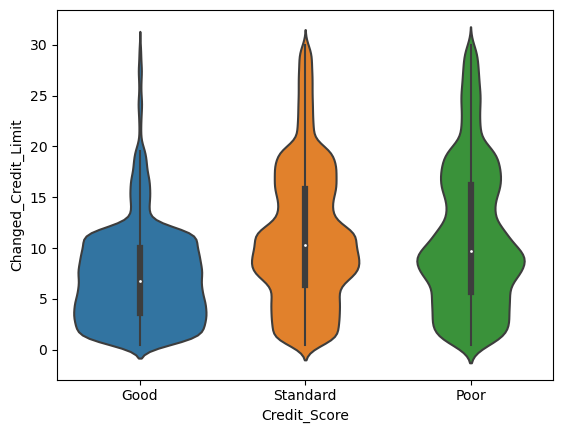

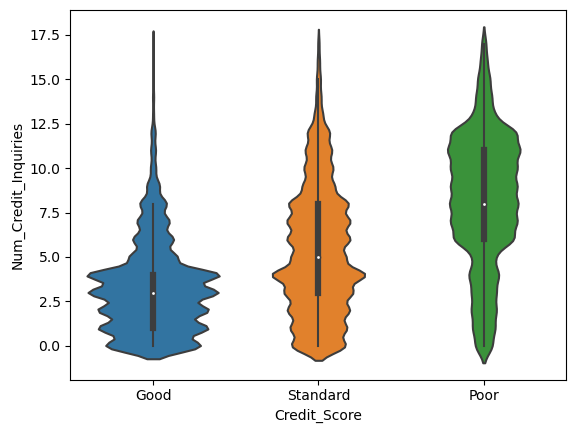

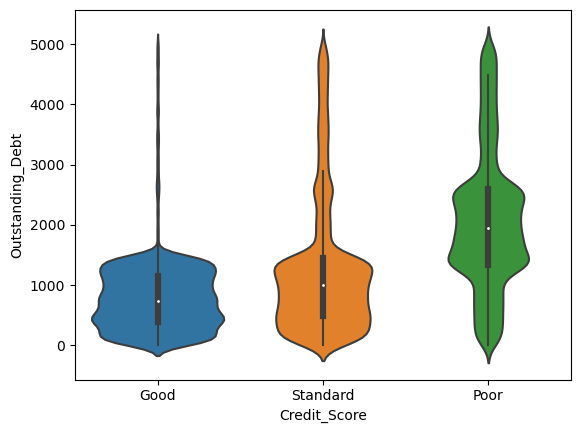

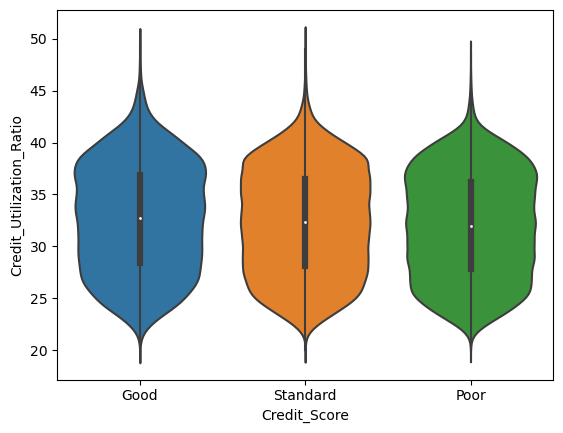

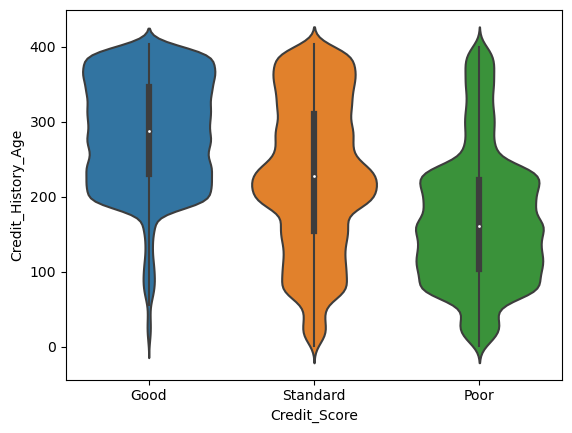

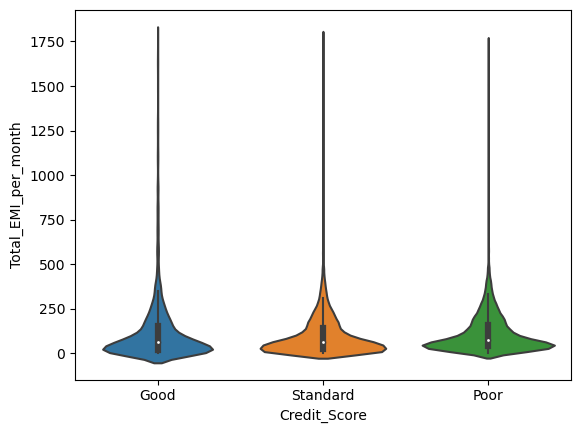

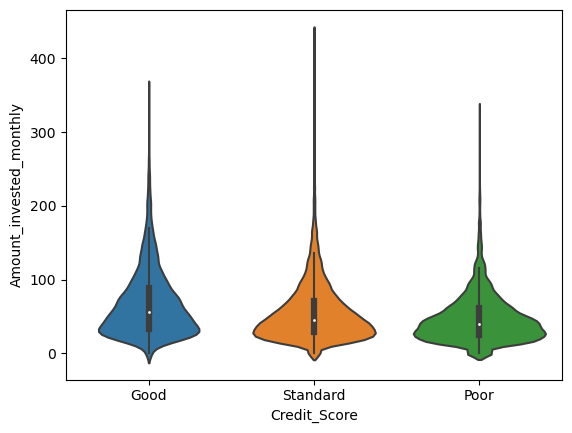

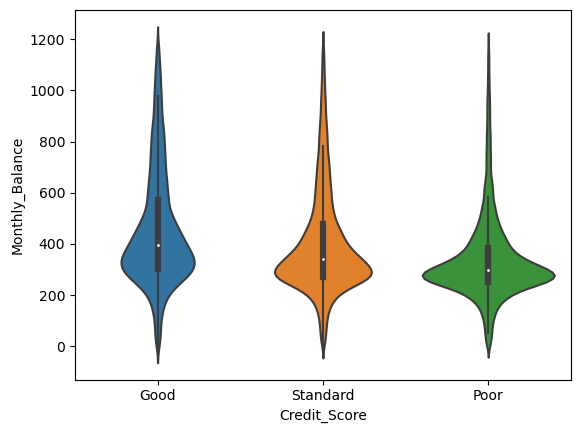

In [7]:
plt.figure(figsize=(6, 4))
columns=['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for column in columns:
    sns.violinplot(x='Credit_Score', y=column, data=dataset)
    plt.show()


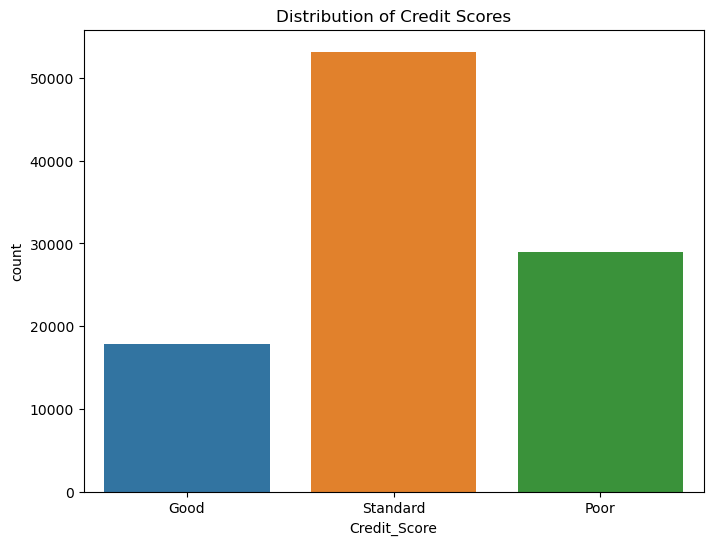

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Credit_Score", data=dataset)
plt.title("Distribution of Credit Scores")
plt.show()


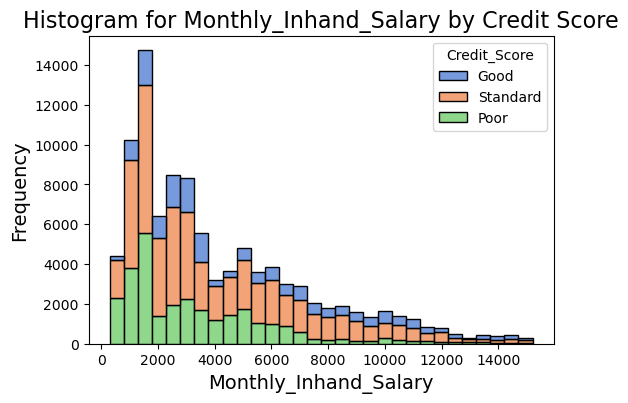

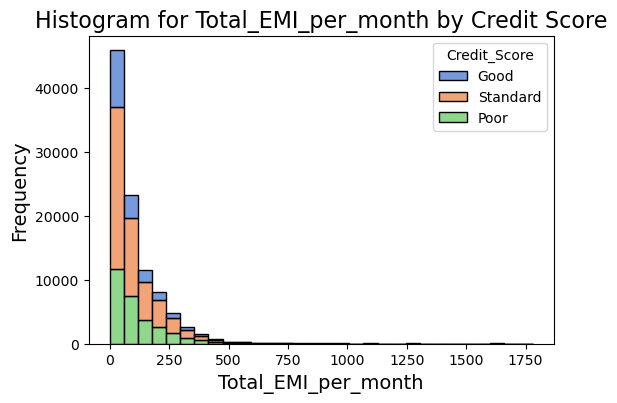

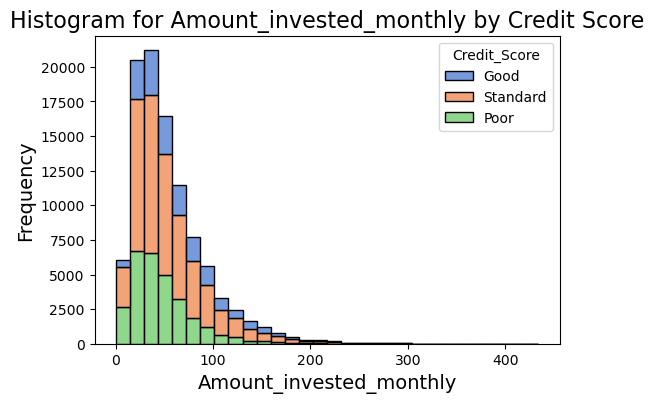

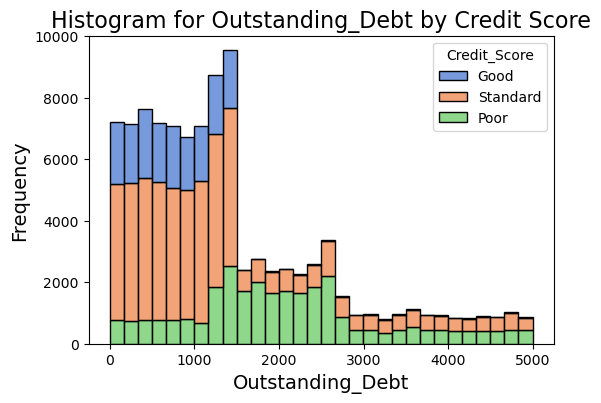

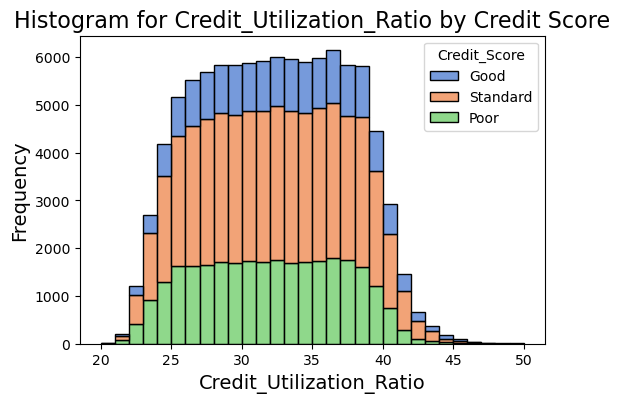

In [9]:
# Categorical variables
categorical_vars = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']  # Add other categorical variables as needed

# Numerical variables
numerical_vars = ['Monthly_Inhand_Salary', 'Total_EMI_per_month','Amount_invested_monthly', 'Outstanding_Debt',	'Credit_Utilization_Ratio']  # Add other numerical variables as needed

# Plot histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset, x=var, hue='Credit_Score', multiple="stack", kde=False, bins=30, palette="muted")
    plt.title(f'Histogram for {var} by Credit Score', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()


# **_Logistic Regression_**


In [10]:
dataset.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

dataset['Type_of_Loan'] = LabelEncoder().fit_transform(dataset['Type_of_Loan'])
dataset['Credit_Mix'] = LabelEncoder().fit_transform(dataset['Credit_Mix'])
dataset['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(dataset['Payment_of_Min_Amount'])
dataset['Payment_Behaviour'] = LabelEncoder().fit_transform(dataset['Payment_Behaviour'])
dataset['Occupation'] = LabelEncoder().fit_transform(dataset['Occupation'])
dataset['Credit_Score'] = LabelEncoder().fit_transform(dataset['Credit_Score'])


In [12]:
y = dataset['Credit_Score']
X = dataset.drop('Credit_Score',axis=1)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_prob=[]


**Scaling the Dataset and splitting data into training and testing data**

In [14]:
print(X)


        Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0          12       19114.12            1824.843333   
1      23.0          12       19114.12            1824.843333   
2      23.0          12       19114.12            1824.843333   
3      23.0          12       19114.12            1824.843333   
4      23.0          12       19114.12            1824.843333   
...     ...         ...            ...                    ...   
99995  25.0           9       39628.99            3359.415833   
99996  25.0           9       39628.99            3359.415833   
99997  25.0           9       39628.99            3359.415833   
99998  25.0           9       39628.99            3359.415833   
99999  25.0           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   


In [15]:
dataset['Type_of_Loan'] = LabelEncoder().fit_transform(dataset['Type_of_Loan'])
dataset['Credit_Mix'] = LabelEncoder().fit_transform(dataset['Credit_Mix'])
dataset['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(dataset['Payment_of_Min_Amount'])
dataset['Payment_Behaviour'] = LabelEncoder().fit_transform(dataset['Payment_Behaviour'])
dataset['Occupation'] = LabelEncoder().fit_transform(dataset['Occupation'])
y = LabelEncoder().fit_transform(y)

columns_to_leave_unchanged = ["Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour","Occupation"]

columns_to_scale = [col for col in X.columns if col not in columns_to_leave_unchanged]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), columns_to_scale)],
    remainder="passthrough",
)

X_scaled_ = preprocessor.fit_transform(X)

columns_after_scaling = columns_to_scale + columns_to_leave_unchanged

X_scaled = pd.DataFrame(X_scaled_, columns=columns_after_scaling)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=101)


***Fitting the dataset in Logistic Regression Model***

In [16]:
logreg_model = LogisticRegression(random_state=0, multi_class='ovr',max_iter=100000)
logreg_model.fit(X_train, y_train)

predictions = logreg_model.predict(X_test)


In [17]:
print("Accuracy:", accuracy_score(y_test, predictions))
pred_prob.append(logreg_model.predict_proba(X_test))


Accuracy: 0.639


In [18]:
print("\nClassification Report:\n", classification_report(y_test, predictions))



Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52      3629
           1       0.65      0.52      0.58      5711
           2       0.65      0.76      0.70     10660

    accuracy                           0.64     20000
   macro avg       0.62      0.58      0.60     20000
weighted avg       0.64      0.64      0.63     20000



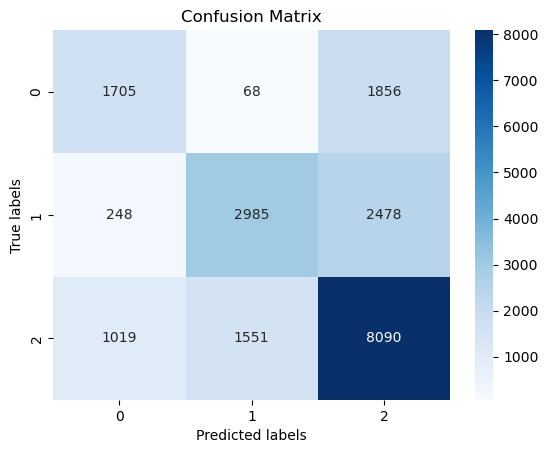

In [19]:
cm_test = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()


# **_KNN Algorithm_**

Confusion Matrix for k=2 : 


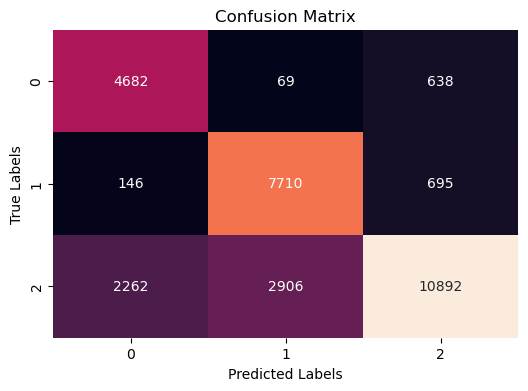

Confusion Matrix for k=3 : 


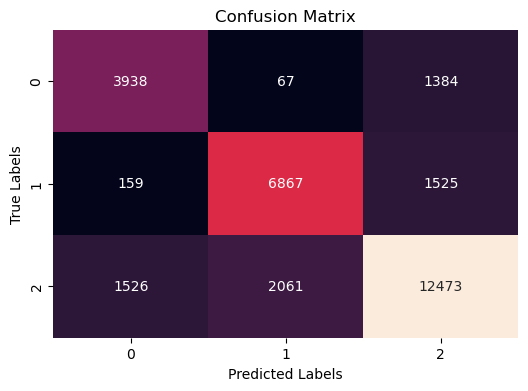

Confusion Matrix for k=4 : 


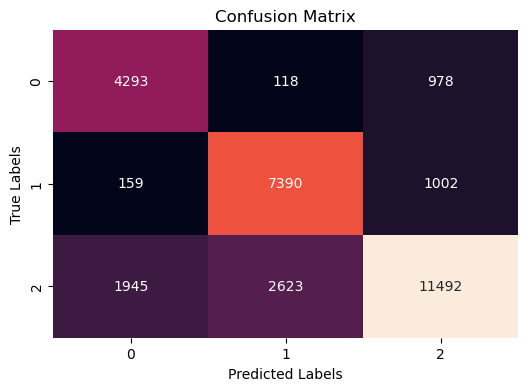

Confusion Matrix for k=5 : 


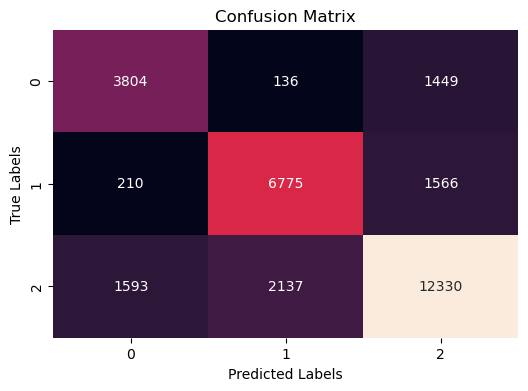

Confusion Matrix for k=6 : 


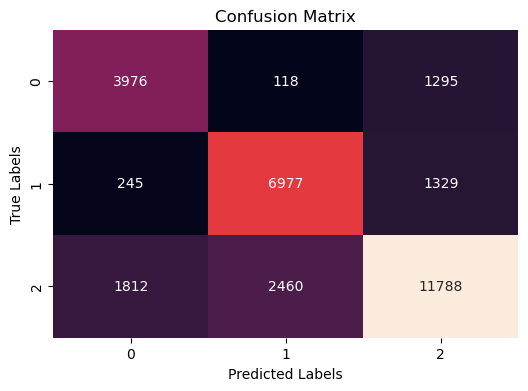

Confusion Matrix for k=7 : 


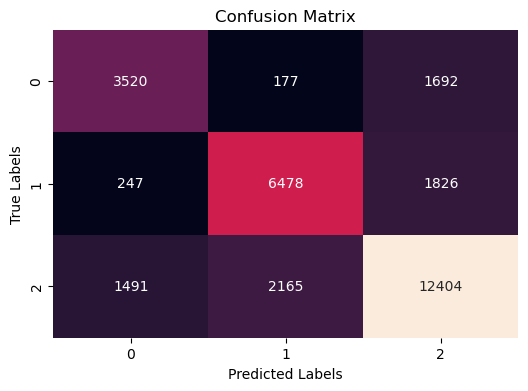

Confusion Matrix for k=8 : 


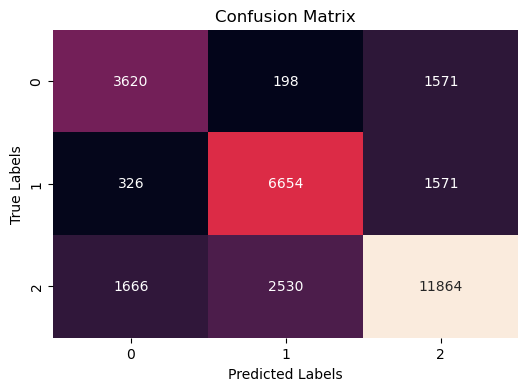

Confusion Matrix for k=9 : 


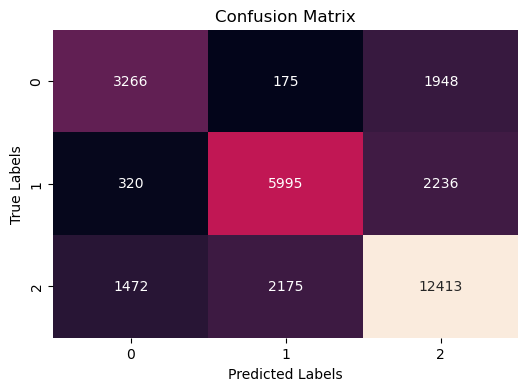

Confusion Matrix for k=10 : 


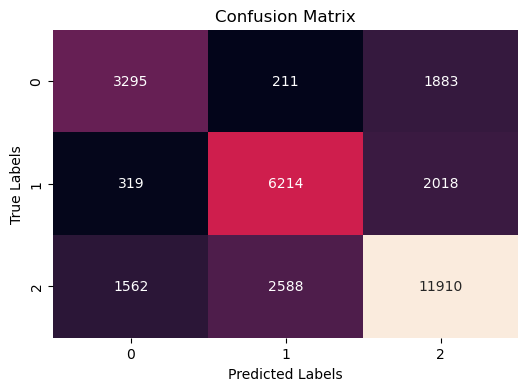

Confusion Matrix for k=11 : 


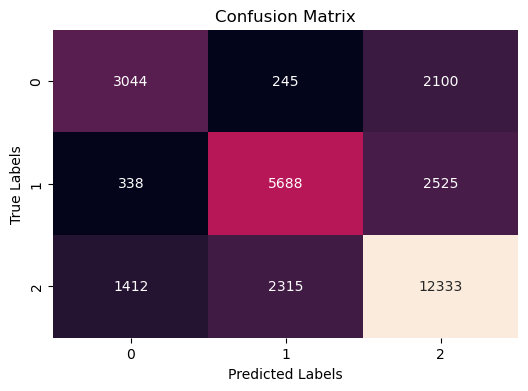

Confusion Matrix for k=12 : 


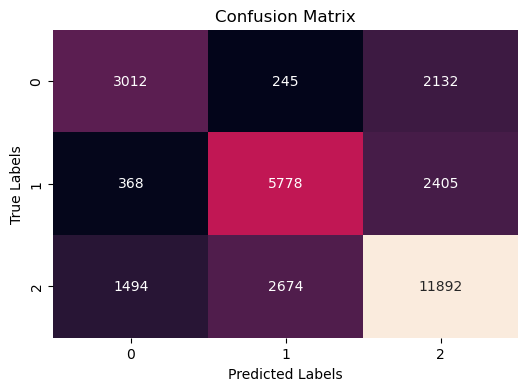

Confusion Matrix for k=13 : 


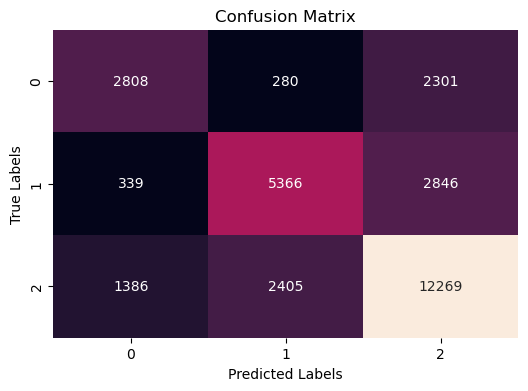

Confusion Matrix for k=14 : 


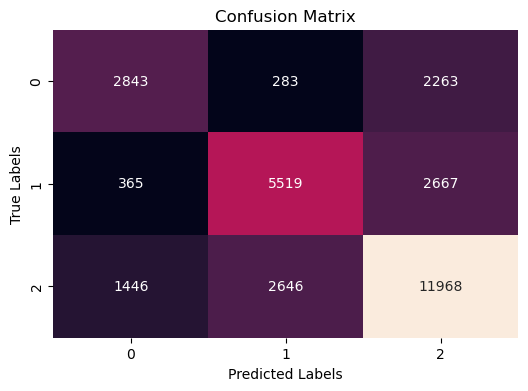

In [20]:
pred_classifier=[]
pred_accuracy=[]
error_rate=[]

X_train, X_test, y_train, y_test = train_test_split( X_scaled.values, dataset['Credit_Score'].values, test_size=0.3, random_state=101)

for i in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors = i) 
    classifier.fit(X_train, y_train) 
    
    prediction_i=classifier.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

    cm=confusion_matrix(y_test,prediction_i)
    print(f'Confusion Matrix for k={i} : ')
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix')
    plt.show()

    pred_accuracy.append(accuracy_score(y_test,prediction_i))
    pred_prob.append(classifier.predict_proba(X_test))


Text(0, 0.5, 'Error Rate')

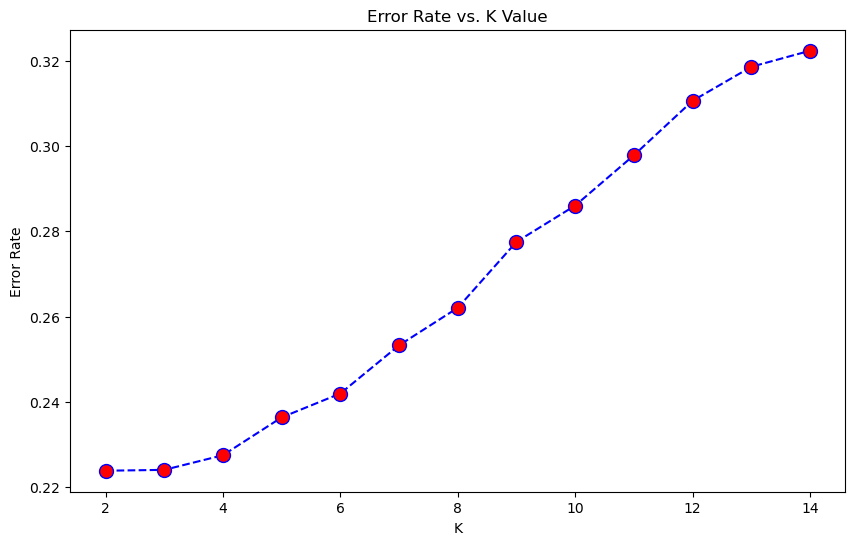

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 2) 
classifier.fit(X_train, y_train) 

prediction_i=classifier.predict(X_test)
error_rate.append(np.mean(prediction_i != y_test))

for i in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors = i) 
    classifier.fit(X_train, y_train) 
    
    prediction_i=classifier.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
    
    cm=confusion_matrix(y_test,prediction_i)
    print(f'Confusion Matrix for k={i} : \n {cm}')
    pred_prob.append(classifier.predict_proba(X_test))


Confusion Matrix for k=2 : 
 [[ 4682    69   638]
 [  146  7710   695]
 [ 2262  2906 10892]]
Confusion Matrix for k=3 : 
 [[ 3938    67  1384]
 [  159  6867  1525]
 [ 1526  2061 12473]]
Confusion Matrix for k=4 : 
 [[ 4293   118   978]
 [  159  7390  1002]
 [ 1945  2623 11492]]
Confusion Matrix for k=5 : 
 [[ 3804   136  1449]
 [  210  6775  1566]
 [ 1593  2137 12330]]
Confusion Matrix for k=6 : 
 [[ 3976   118  1295]
 [  245  6977  1329]
 [ 1812  2460 11788]]
Confusion Matrix for k=7 : 
 [[ 3520   177  1692]
 [  247  6478  1826]
 [ 1491  2165 12404]]
Confusion Matrix for k=8 : 
 [[ 3620   198  1571]
 [  326  6654  1571]
 [ 1666  2530 11864]]
Confusion Matrix for k=9 : 
 [[ 3266   175  1948]
 [  320  5995  2236]
 [ 1472  2175 12413]]
Confusion Matrix for k=10 : 
 [[ 3295   211  1883]
 [  319  6214  2018]
 [ 1562  2588 11910]]
Confusion Matrix for k=11 : 
 [[ 3044   245  2100]
 [  338  5688  2525]
 [ 1412  2315 12333]]
Confusion Matrix for k=12 : 
 [[ 3012   245  2132]
 [  368  5778  24

In [23]:
for i in range(1,10):
  print("The accuracy for KNN model for k = {}".format(i+1))
  print(pred_accuracy[i-1])


The accuracy for KNN model for k = 2
0.7761333333333333
The accuracy for KNN model for k = 3
0.7759333333333334
The accuracy for KNN model for k = 4
0.7725
The accuracy for KNN model for k = 5
0.7636333333333334
The accuracy for KNN model for k = 6
0.7580333333333333
The accuracy for KNN model for k = 7
0.7467333333333334
The accuracy for KNN model for k = 8
0.7379333333333333
The accuracy for KNN model for k = 9
0.7224666666666667
The accuracy for KNN model for k = 10
0.7139666666666666


In [24]:
print((pred_prob))


[array([[0.50013788, 0.09972153, 0.4001406 ],
       [0.09221954, 0.0913375 , 0.81644296],
       [0.03502373, 0.20880936, 0.75616691],
       ...,
       [0.08064669, 0.13668937, 0.78266394],
       [0.00266714, 0.54999284, 0.44734002],
       [0.30222828, 0.19934918, 0.49842255]]), array([[0.5, 0. , 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       ...,
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5]]), array([[0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       ...,
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667]]), array([[0.25, 0.  , 0.75],
       [0.  , 0.25, 0.75],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.75, 0.25],
       [0.  , 0.25, 0.75]]), array([[0.4, 0. , 0.6],
       [0. , 0.4, 0.6],
       [0. , 0.2, 0.8],
       ...,
       [0. , 

# **------------------------------------------------------**

# **IRIS DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, roc_curve


In [47]:
df = pd.read_csv('./iris.csv')


In [49]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
df.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis and Visualization

In [48]:
fig = px.scatter(data_frame=df,x='SepalLengthCm',y='SepalWidthCm' , color='Species')
fig.update_layout(title='Sepal Length vs Sepal Width')
fig.show()


In [53]:
fig = px.scatter(data_frame=df,x='PetalLengthCm',y='PetalWidthCm' , color='Species')
fig.update_layout(title='Petal Length vs Petal Width')
fig.show()


In [54]:
for i in range(4):
    fig = px.histogram(df, x=df.columns[i], color="Species", facet_col="Species", histnorm="probability density", nbins=100)
    fig.update_layout(title="Density distribution of "+df.columns[i]+" by Species")
    fig.show()


In [55]:
fig = px.pie(values=df['Species'].value_counts().values,names=df['Species'].value_counts().index)
fig.update_layout(title="Species")
fig.show()


# Data Preprocessing

## Label Ecoding the Species

In [56]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


In [57]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


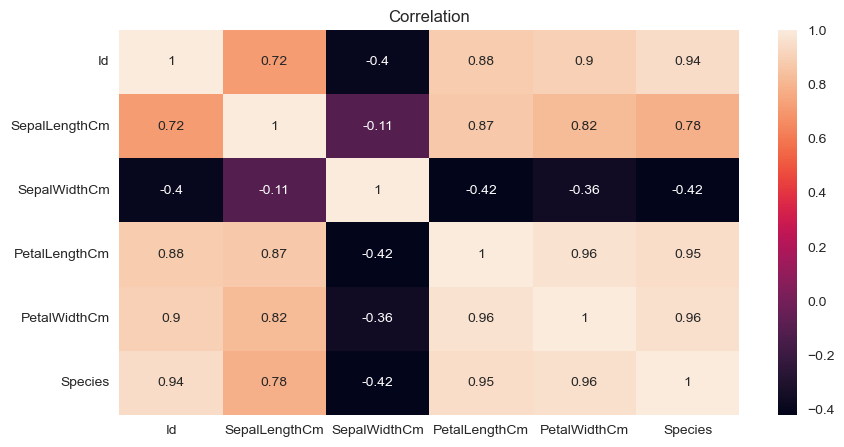

In [58]:
plt.figure(figsize=(10,5)) 
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.title('Correlation')
plt.show()


## Splitting the data

In [59]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)


## Feature Scaling for Classification

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Classification Models

## Logistic Regression

## K-Nearest-Neighbour

### Evaluating the model

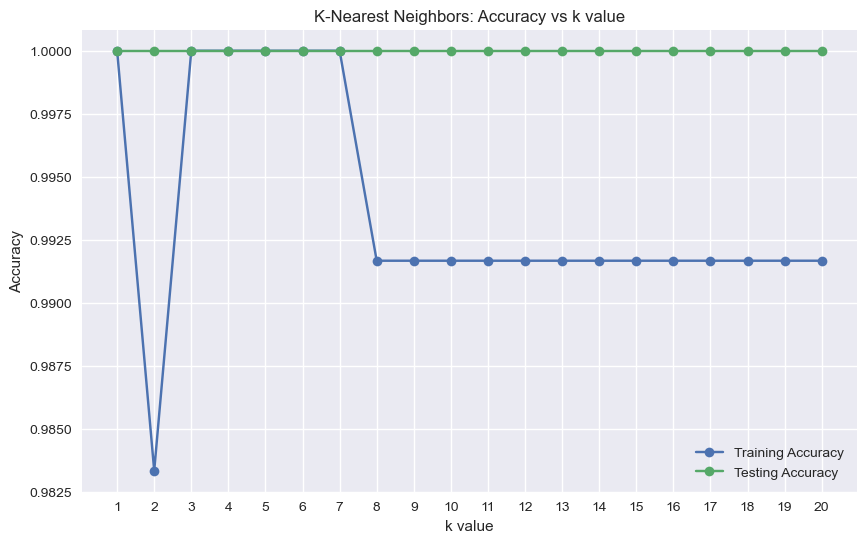

In [62]:
k_values = list(range(1, 21)) 

knn_train_acc_values = []
knn_test_acc_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    knn_train_acc_values.append(train_acc)
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    knn_test_acc_values.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_train_acc_values, marker='o', label='Training Accuracy')
plt.plot(k_values, knn_test_acc_values, marker='o', label='Testing Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors: Accuracy vs k value')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


# **--------------------------------------------------------------**

# **DIABETES DATASET**

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **_DATA_**


In [259]:
diabetes = pd.read_csv("./Diabetes.csv")
print(diabetes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# **_Preprocessed Data_**


In [260]:
diabetes.drop_duplicates(inplace=True)
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

# **_Statistics Summary_**


In [261]:
print("\nSummary Statistics")
print(diabetes.describe())



Summary Statistics
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921       0.496598       0.197047   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  229781.00000  229781.000000  229781.000000         229781.000000   
mean       28.68567       0.465661       0.044756              0.103216   
std         6.78636       0.498821       0.206767              0.304241   
min        12.00000       0.000000       0.000000         

# **_Description of Data_**


In [262]:
print(diabetes.head)


<bound method NDFrame.head of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcar

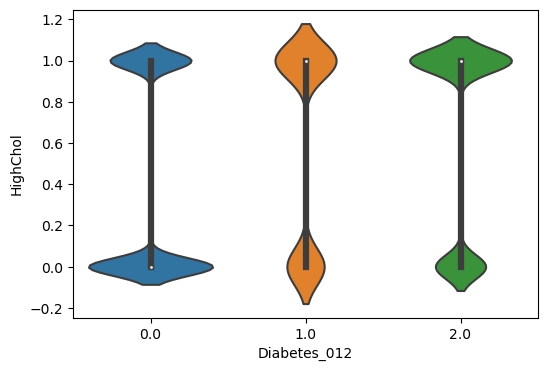

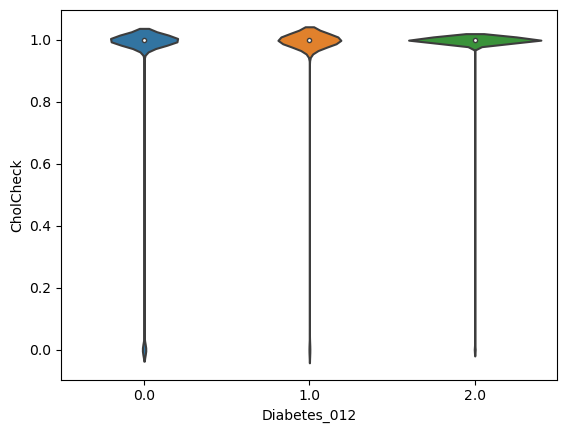

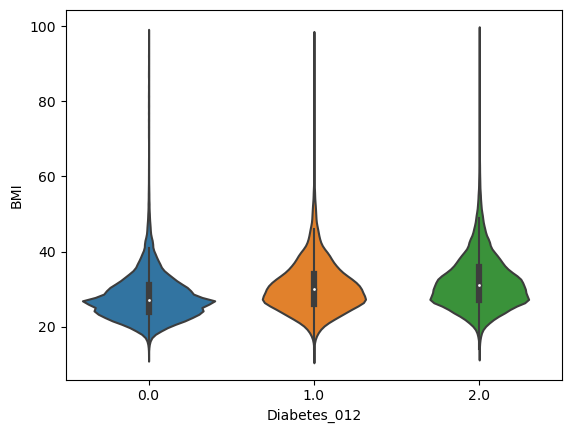

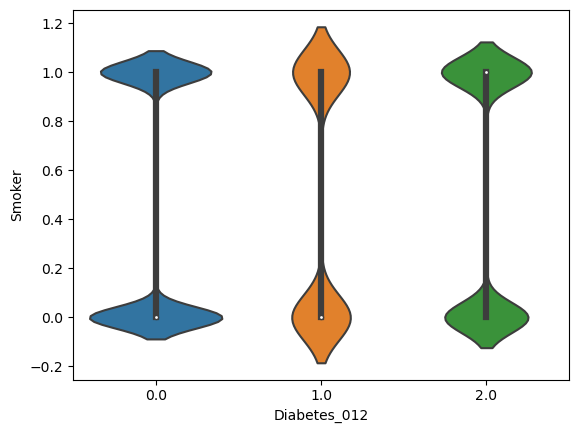

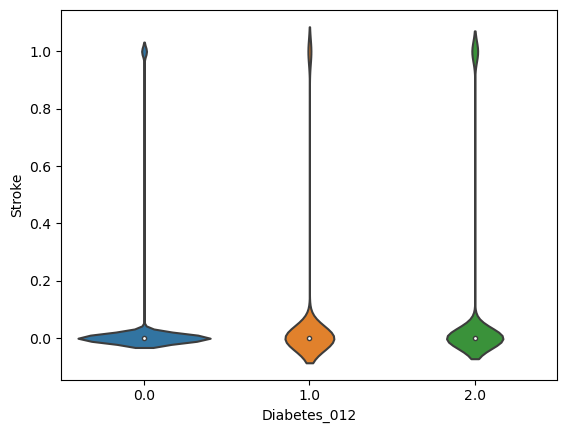

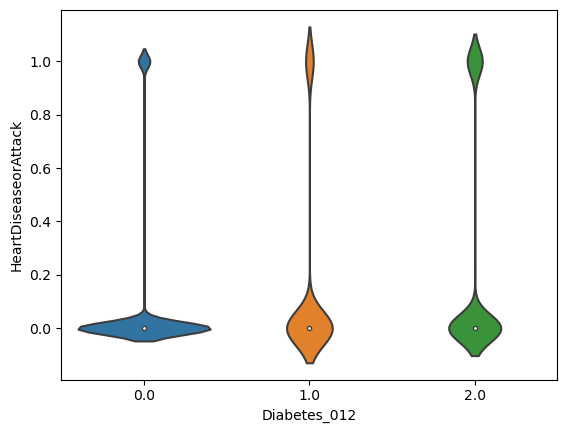

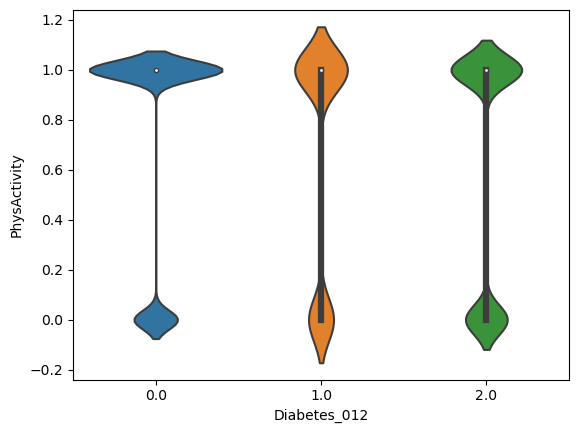

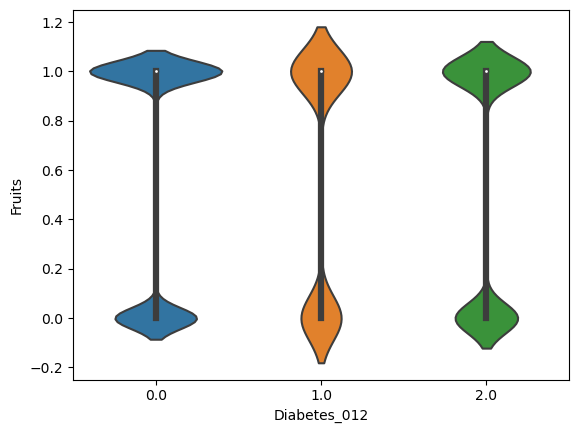

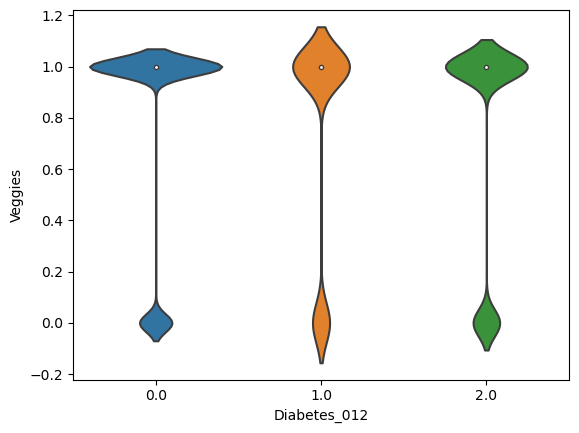

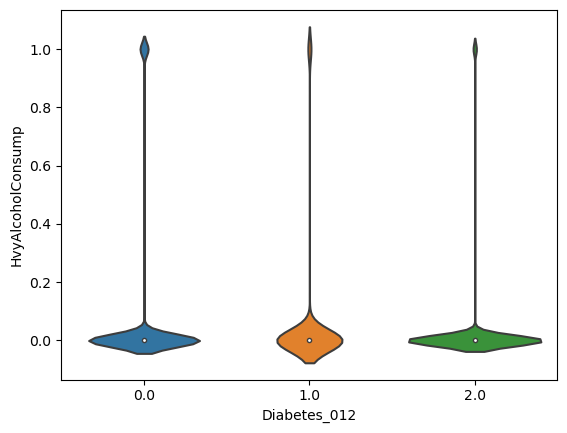

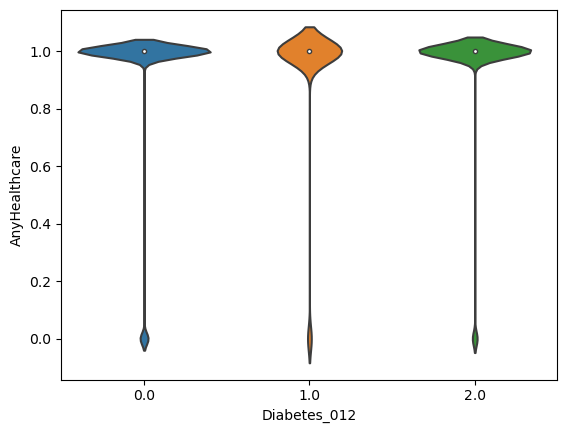

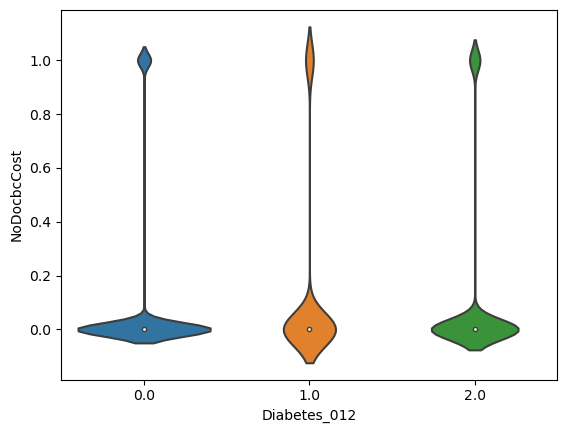

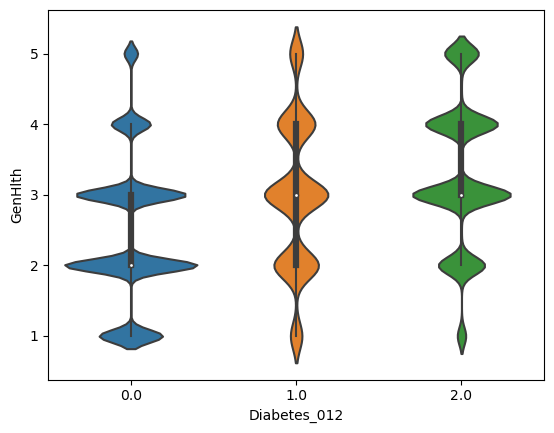

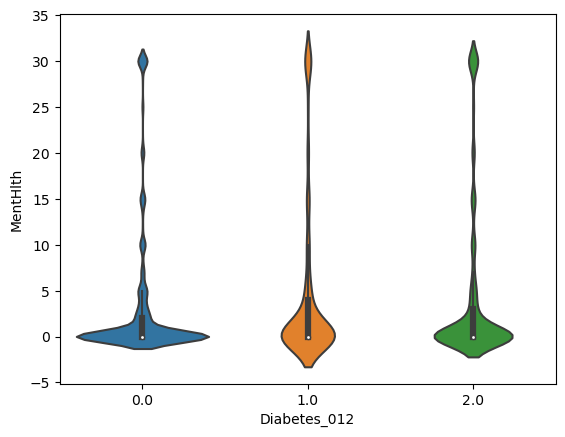

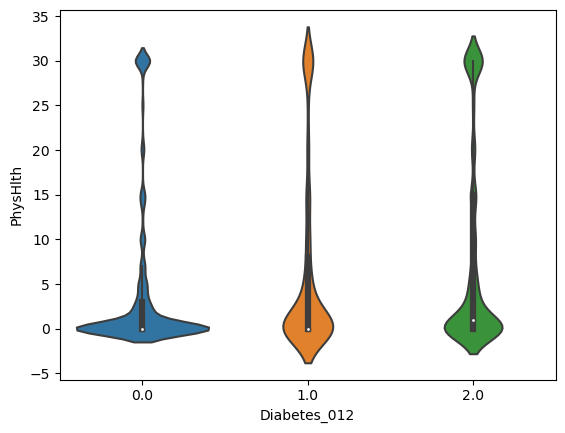

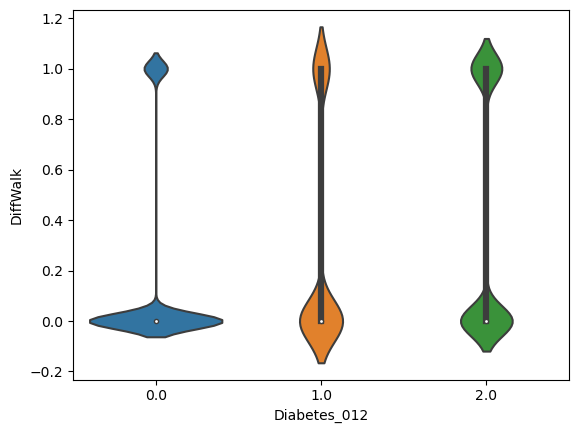

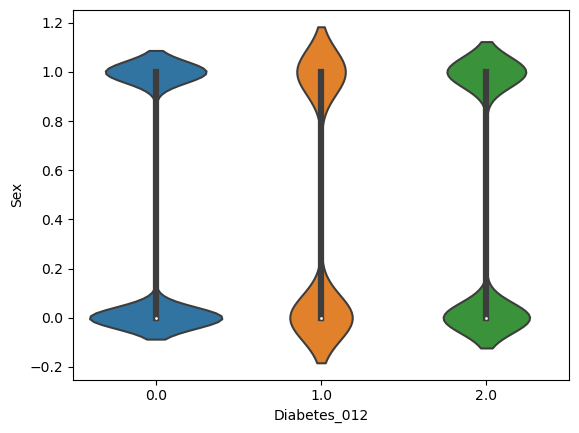

In [263]:
plt.figure(figsize=(6, 4))
columns=diabetes.columns[2:-3]
for column in columns:
    sns.violinplot(x='Diabetes_012', y=column, data=diabetes)
    plt.show()


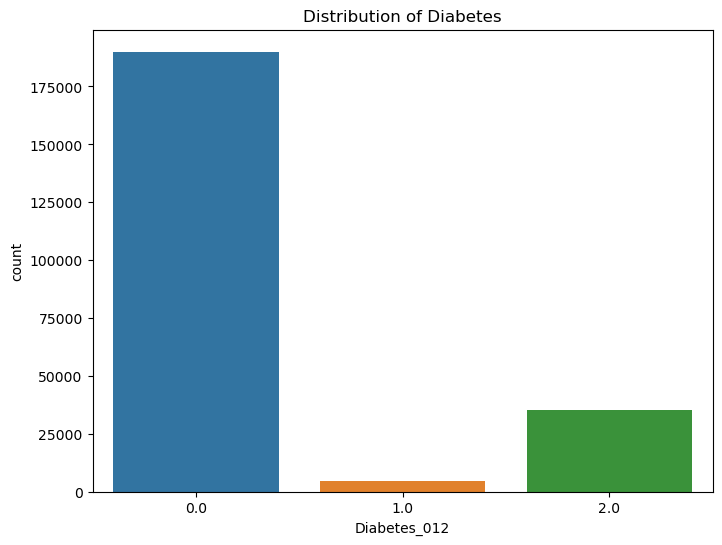

In [264]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Diabetes_012", data=diabetes)
plt.title("Distribution of Diabetes")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


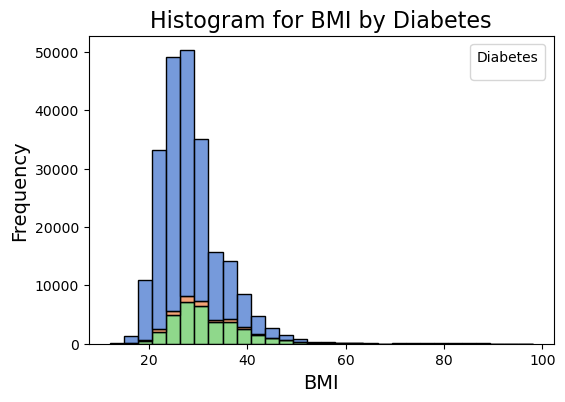

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


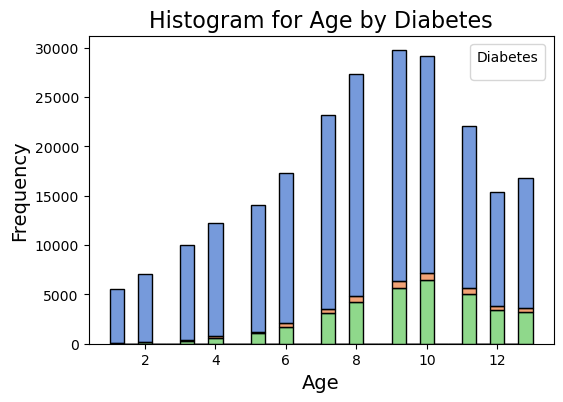

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


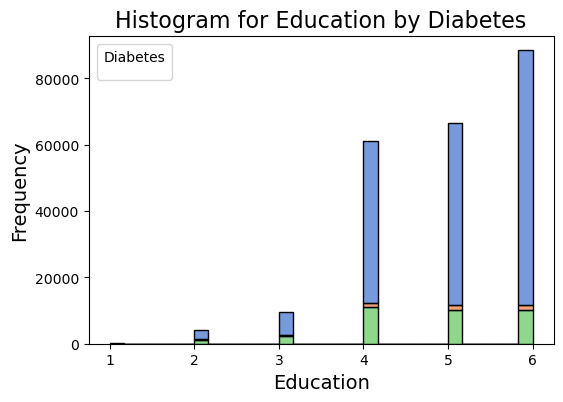

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


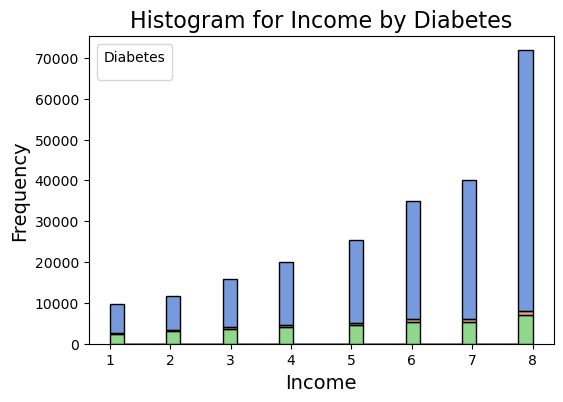

In [356]:
numerical_vars = ['BMI', 'Age','Education','Income']  # Add other numerical variables as needed


for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetes, x=var, hue='Diabetes_012', multiple="stack", kde=False, bins=30, palette="muted")
    plt.title(f'Histogram for {var} by Diabetes', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Diabetes', fontsize=12)
    plt.show()



### ***Outliers Detection***

In [265]:
from scipy import stats

z_scores = stats.zscore(diabetes)
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())


Diabetes_012                0
HighBP                      0
HighChol                    0
CholCheck                9298
BMI                      2547
Smoker                      0
Stroke                  10284
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump       13950
AnyHealthcare           12391
NoDocbcCost             21326
GenHlth                     0
MentHlth                12644
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                4214
Income                      0
dtype: int64


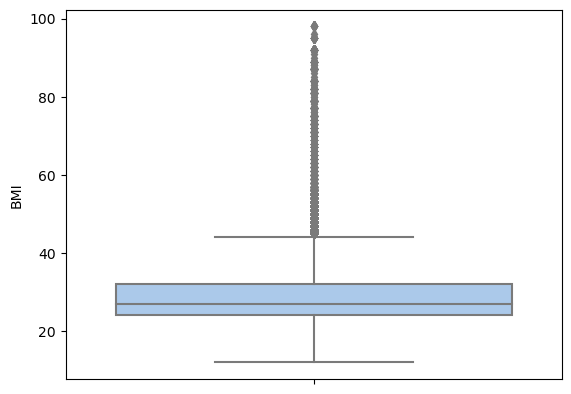

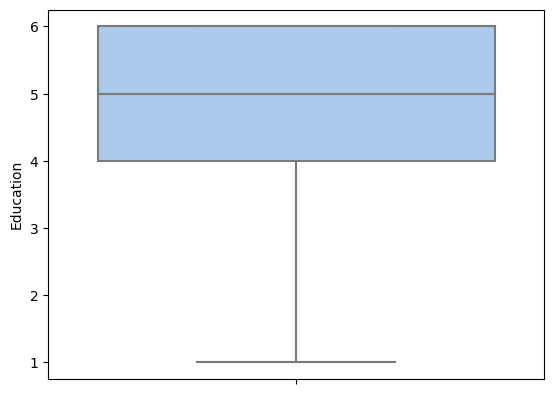

In [357]:
sns.boxplot(y=diabetes['BMI'],whis=1.5)
plt.show()
sns.boxplot(y=diabetes['Education'], whis=1.5)
plt.show()


In [267]:
diabetes.corr()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,0.170816,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
HighBP,0.261976,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.201271,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.203327,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.176279,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.075701,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.049995,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.212027,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.039926,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.046774,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.105154,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.100276,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.198863,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
HeartDiseaseorAttack,0.170816,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,1.000000,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
PhysActivity,-0.103408,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.073267,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.025462,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.007128,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


<Axes: >

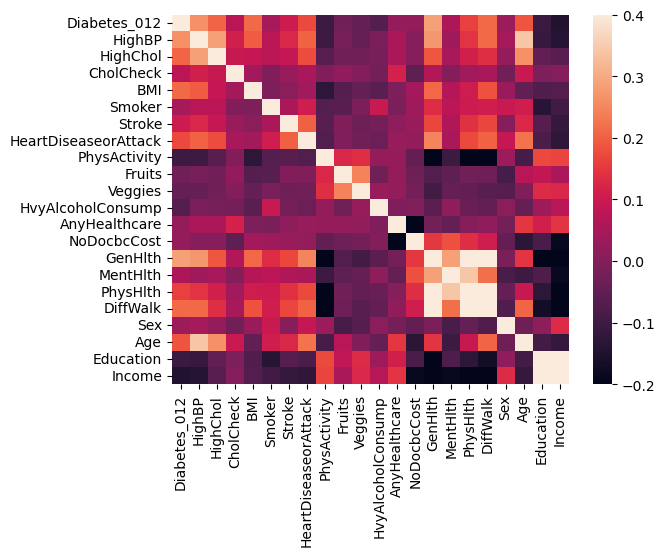

In [268]:
sns.heatmap(diabetes.corr(), vmin=-0.2, vmax=0.4)


In [269]:
X = diabetes.drop("Diabetes_012", axis=1)
y = diabetes["Diabetes_012"]



In [270]:
X


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [271]:
y


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 229781, dtype: float64

In [272]:
import numpy as np

print(np.mean(X, axis=0))


HighBP                   0.454441
HighChol                 0.441760
CholCheck                0.959535
BMI                     28.685670
Smoker                   0.465661
Stroke                   0.044756
HeartDiseaseorAttack     0.103216
PhysActivity             0.733355
Fruits                   0.612966
Veggies                  0.794813
HvyAlcoholConsump        0.060710
AnyHealthcare            0.946075
NoDocbcCost              0.092810
GenHlth                  2.601151
MentHlth                 3.505373
PhysHlth                 4.675178
DiffWalk                 0.185507
Sex                      0.439231
Age                      8.086582
Education                4.980568
Income                   5.890383
dtype: float64


# **_Logistic Regression_**


In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_prob=[]


**Scaling the Dataset and splitting data into training and testing data**


In [274]:
columns_to_scale = ["BMI", "Age", "Income", "Education"]

columns_to_leave_unchanged = [col for col in X.columns if col not in columns_to_scale]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), columns_to_scale)],
    remainder="passthrough",
)

X_scaled_ = preprocessor.fit_transform(X)

columns_after_scaling = columns_to_scale + columns_to_leave_unchanged

X_scaled = pd.DataFrame(X_scaled_, columns=columns_after_scaling)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.3, random_state=101)


***Fitting the dataset in Logistic Regression Model***

In [319]:
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)

predictions = logreg_model.predict(X_test)


In [320]:
print("Accuracy:", accuracy_score(y_test, predictions))
pred_prob.append(logreg_model.predict_proba(X_test))


Accuracy: 0.693378232616874


In [277]:
print("\nClassification Report:\n", classification_report(y_test, predictions))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57066
         1.0       0.00      0.00      0.00      1341
         2.0       0.53      0.17      0.26     10528

    accuracy                           0.83     68935
   macro avg       0.46      0.38      0.39     68935
weighted avg       0.78      0.83      0.79     68935



/Users/sakshibansal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sakshibansal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sakshibansal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


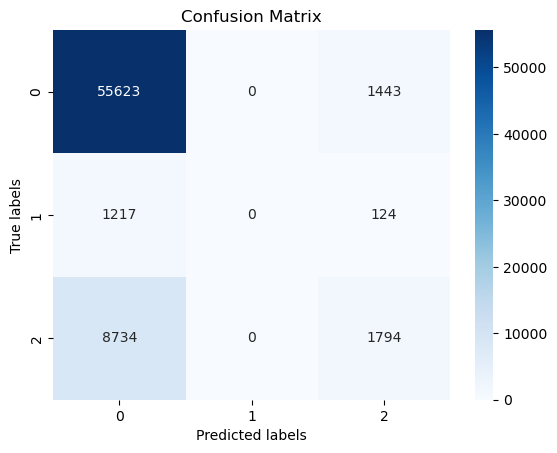

In [278]:
cm_test = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()


***Resampling the minority class using bootstrapping***

In [361]:
majority_class = diabetes[diabetes["Diabetes_012"] == 0]
minority_class = diabetes[diabetes["Diabetes_012"] != 0]

# Determine the size of the majority class
majority_size = len(majority_class)

# Resample the minority class using bootstrapping
bootstrapped_minority = minority_class.sample(
    n=majority_size, replace=True, random_state=42
)

# Concatenate the resampled minority class with the majority class
oversampled_data = pd.concat([majority_class, bootstrapped_minority])

# Shuffle the oversampled data to mix the classes
oversampled_data = oversampled_data.sample(frac=1, random_state=42).reset_index(
    drop=True
)

X_train, X_test, y_train, y_test = train_test_split(
    oversampled_data.drop("Diabetes_012", axis=1),
    oversampled_data["Diabetes_012"],
    test_size=0.3,
    random_state=101,
)


model = LogisticRegression(class_weight="balanced", max_iter=10000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70     56877
         1.0       0.08      0.30      0.13      6672
         2.0       0.69      0.59      0.64     50484

    accuracy                           0.60    114033
   macro avg       0.52      0.51      0.49    114033
weighted avg       0.70      0.60      0.64    114033



In [280]:
print("Accuracy : ",accuracy_score(y_test, predictions))


Accuracy :  0.598239106223637


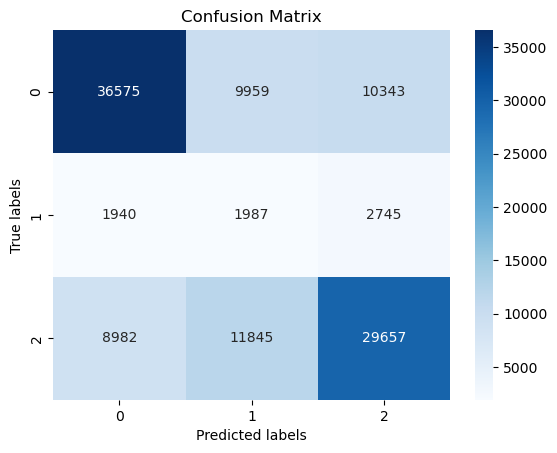

In [281]:
cm_test = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()


# **_KNN Algorithm_**


Confusion Matrix for k=2 : 


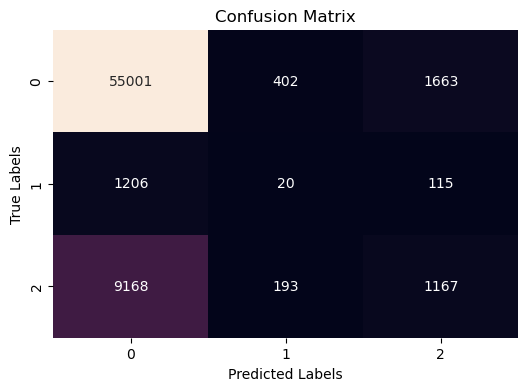

Confusion Matrix for k=3 : 


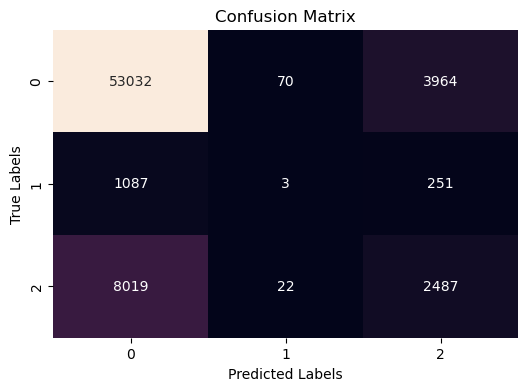

Confusion Matrix for k=4 : 


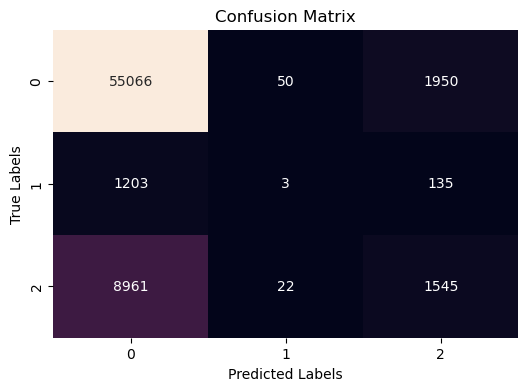

Confusion Matrix for k=5 : 


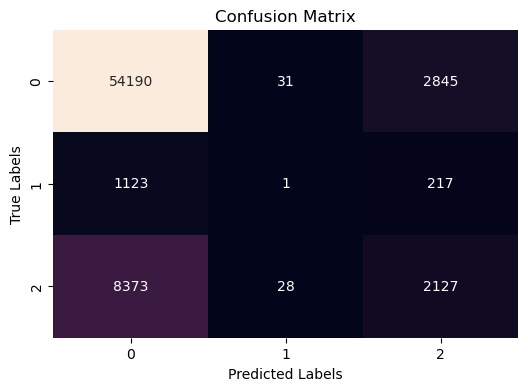

Confusion Matrix for k=6 : 


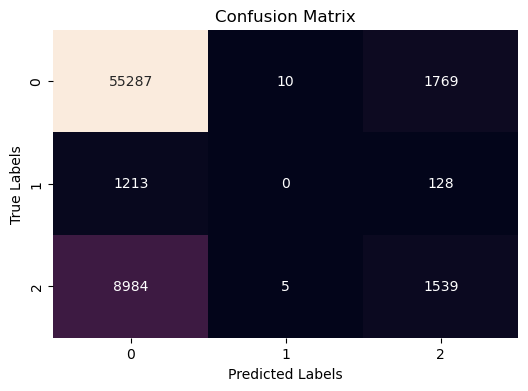

Confusion Matrix for k=7 : 


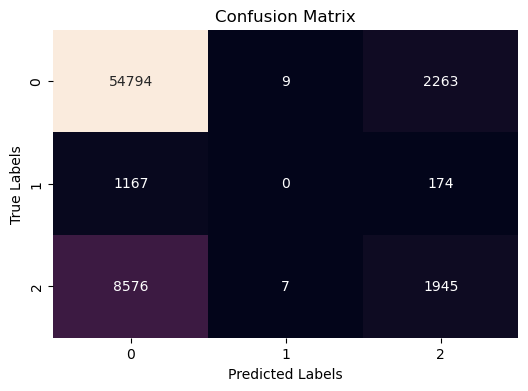

Confusion Matrix for k=8 : 


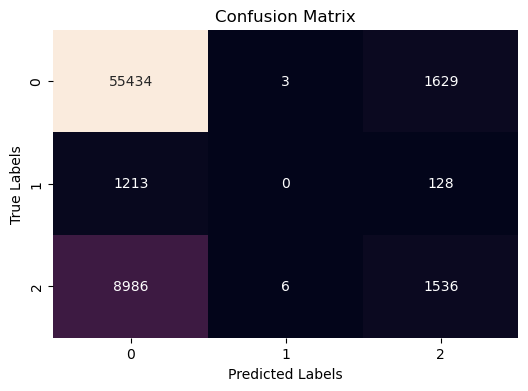

Confusion Matrix for k=9 : 


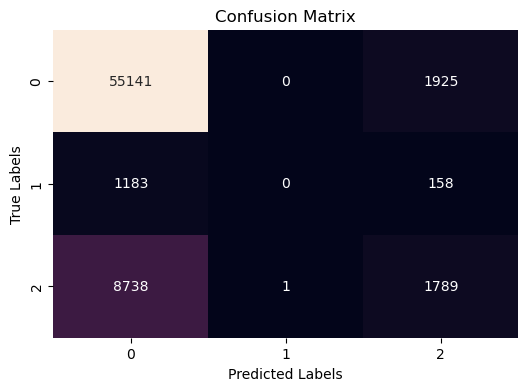

Confusion Matrix for k=10 : 


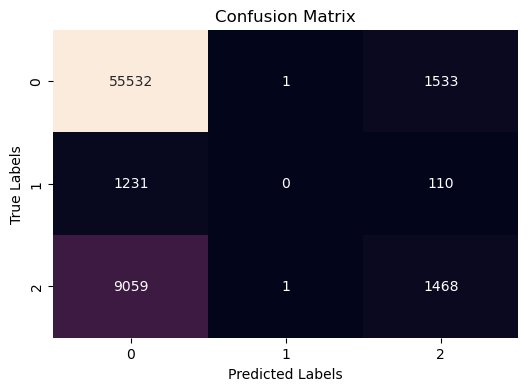

Confusion Matrix for k=11 : 


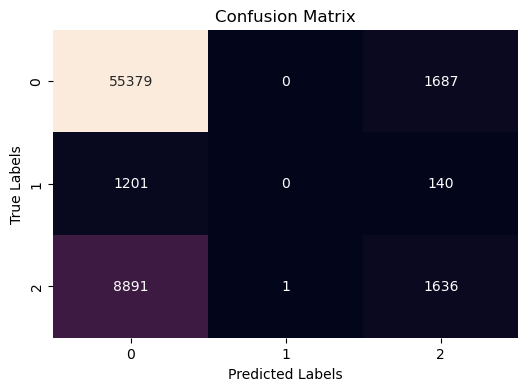

Confusion Matrix for k=12 : 


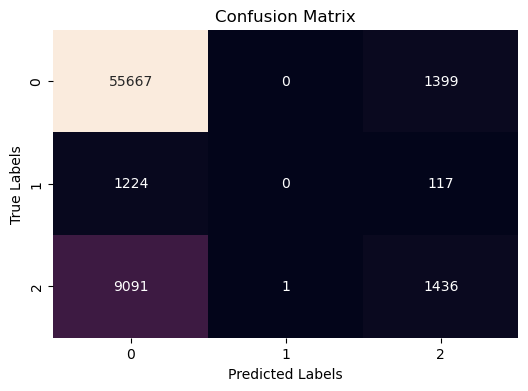

Confusion Matrix for k=13 : 


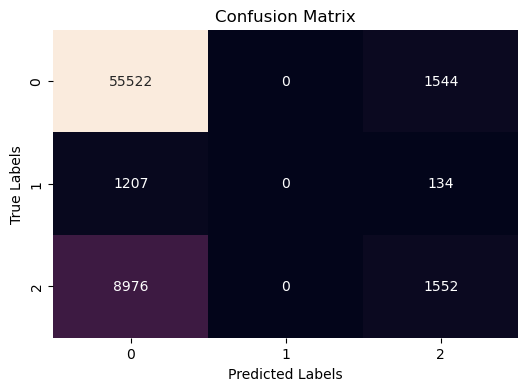

Confusion Matrix for k=14 : 


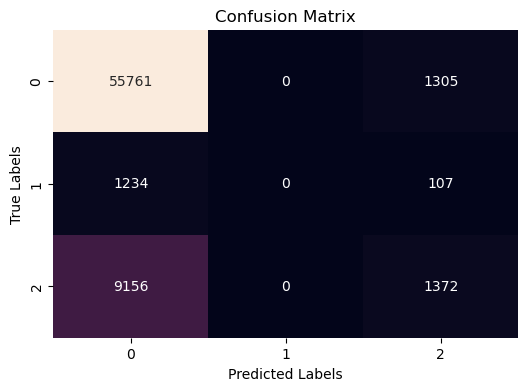

In [333]:
pred_classifier=[]
pred_accuracy=[]
error_rate=[]

X_train, X_test, y_train, y_test = train_test_split( X_scaled.values, diabetes['Diabetes_012'].values, test_size=0.3, random_state=101)



for i in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors = i) 
    classifier.fit(X_train, y_train) 
    
    prediction_i=classifier.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

    cm=confusion_matrix(y_test,prediction_i)
    print(f'Confusion Matrix for k={i} : ')
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix')
    plt.show()

    pred_accuracy.append(accuracy_score(y_test,prediction_i))

   


Text(0, 0.5, 'Error Rate')

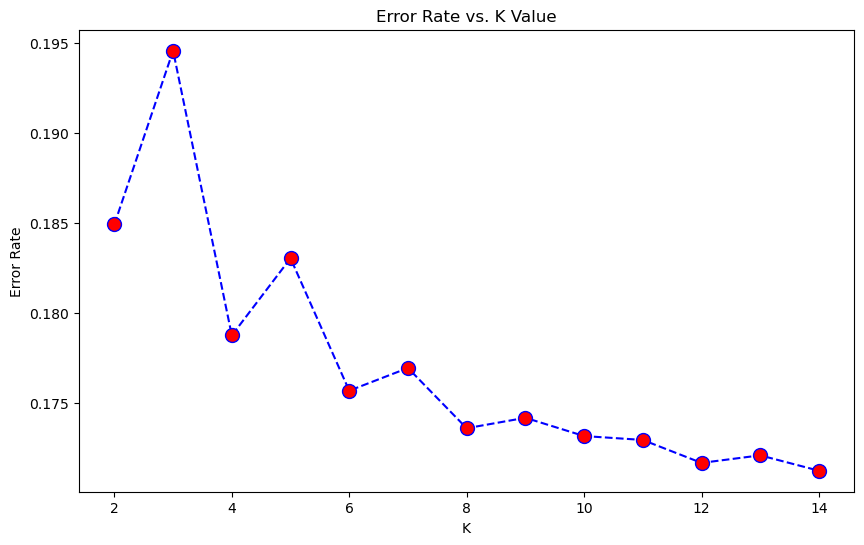

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
for i in range(1,13):
  print("The accuracy for KNN model for k = {}".format(i+1))
  print(pred_accuracy[i-1])


The accuracy for KNN model for k = 2
0.8150866758540655
The accuracy for KNN model for k = 3
0.8054254007398274
The accuracy for KNN model for k = 4
0.8212664103865961
The accuracy for KNN model for k = 5
0.8169725103358236
The accuracy for KNN model for k = 6
0.824341771233771
The accuracy for KNN model for k = 7
0.823079712772902
The accuracy for KNN model for k = 8
0.8264306955827954
The accuracy for KNN model for k = 9
0.8258504388191775
The accuracy for KNN model for k = 10
0.8268658881555088
The accuracy for KNN model for k = 11
0.8270834844418655
The accuracy for KNN model for k = 12
0.8283600493218249
The accuracy for KNN model for k = 13
0.8279393631682019


# **---------------------------------------------------------------**

# **STROKE DATASET**

# Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score


# Data Exploration

In [12]:
df=pd.read_csv('stroke.csv')
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


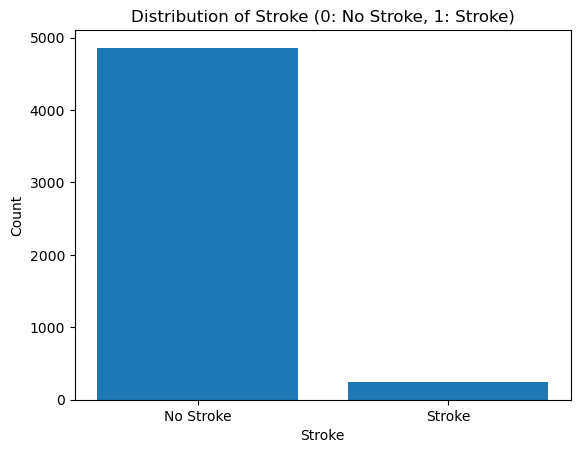

In [13]:
value_counts = df['stroke'].value_counts()
plt.bar(['No Stroke', 'Stroke'], value_counts.values)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke (0: No Stroke, 1: Stroke)')
plt.show()


In [14]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data analysis and visualization

In [16]:
fig = px.scatter(data_frame=df,x='avg_glucose_level',y='age' , color='gender')
fig.update_layout(title='avg_glucose_level vs age')
fig.show()


In [17]:
fig = px.scatter(data_frame=df,x='bmi',y='age' , color='work_type')
fig.update_layout(title='bmi vs age')
fig.show()


In [18]:
fig = px.scatter(data_frame=df,x='avg_glucose_level',y='bmi' , color='work_type')
fig.update_layout(title='avg_glucose_level vs bmi')
fig.show()


<Axes: xlabel='age', ylabel='smoking_status'>

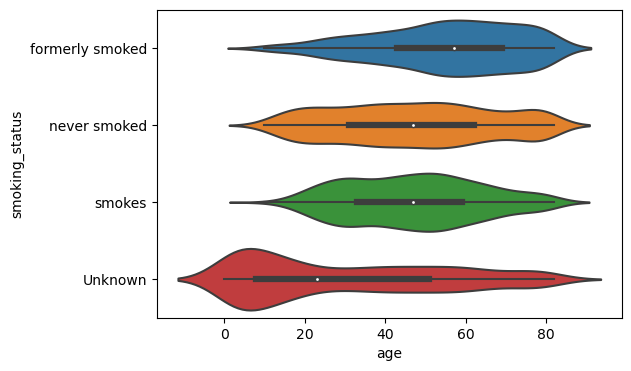

In [19]:
plt.figure(figsize=(6,4))
sns.violinplot(x='age',y='smoking_status',data=df)


<Axes: xlabel='heart_disease', ylabel='avg_glucose_level'>

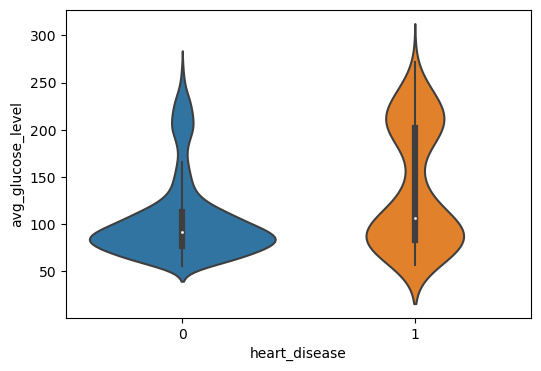

In [20]:
plt.figure(figsize=(6,4))
sns.violinplot(x='heart_disease',y='avg_glucose_level',data=df)


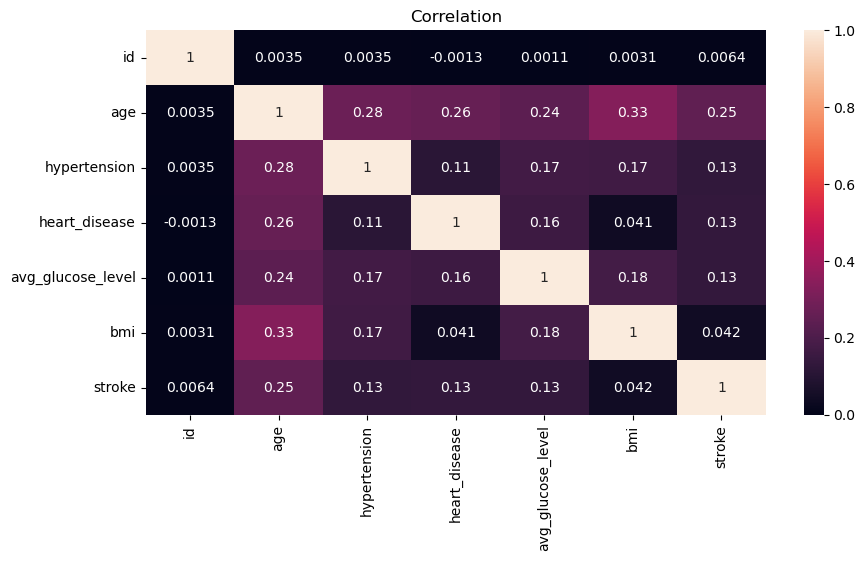

In [21]:
plt.figure(figsize=(10,5)) 
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.title('Correlation')
plt.show()


# Data Preprocessing

### Dropping unnecessary columns

In [22]:
df = df.drop('id', axis=1)
df = df.drop('ever_married', axis=1)
df


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


## Checking for null values and filling them

In [23]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.600000,formerly smoked,0


## One Hot Encoding

In [25]:
df = pd.get_dummies(df, columns = ['work_type','Residence_type','gender','smoking_status']) 
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,False,False,True,False,True,False,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,False,True,False,True,False,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,False,True,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,False,False,True,True,False,False,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,False,True,False,False,True,True,False,False,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,False,True,False,True,False,True,False,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,False,True,False,False,True,False,False,True,False,False,True,False,False


## Removing unnecessary columns creating high correlation

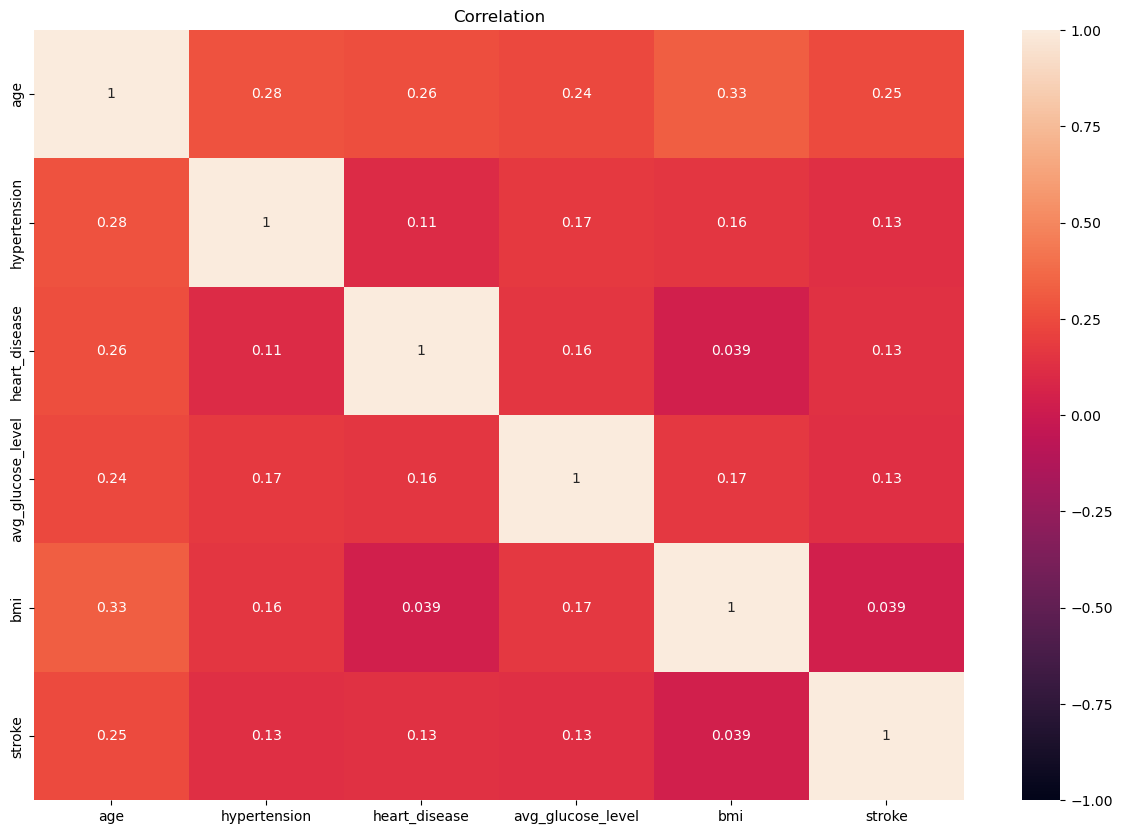

In [30]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df.select_dtypes('number').corr(),annot=True,vmin=-1,vmax=1)
plt.title('Correlation')
plt.show()


In [31]:
df = df.drop('Residence_type_Rural', axis=1)
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,False,True,False,True,False,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,False,False,True,False,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,False,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,False,True,True,False,False,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,False,True,True,False,False,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,False,True,False,True,True,False,False,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,False,True,False,False,True,False,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,False,True,False,False,False,False,True,False,False,True,False,False


In [32]:
df = df.drop('gender_Other', axis=1)
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,False,True,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,False,False,False,True,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,False,True,True,False,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,False,True,True,False,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,False,True,False,True,True,False,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,False,True,False,False,False,False,True,False,True,False,False


In [33]:
df = df.drop('gender_Male', axis=1)
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,gender_Female,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,False,True,False,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,False,False,True,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,False,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,False,True,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,False,True,True,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,False,True,False,True,True,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,False,True,False,False,True,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,False,True,False,False,False,False,False,True,False,False


In [34]:
df = df.drop('smoking_status_formerly smoked', axis=1)
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,gender_Female,smoking_status_Unknown,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,False,True,False,False,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,False,False,True,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,False,True,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,False,True,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,False,True,False,True,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,False,True,False,False,True,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,False,True,False,False,False,False,False,False,False


## Splitting the data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:11],df.iloc[:,-1],test_size=0.3,random_state=2)


## Feature scaling for classification

In [36]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [37]:
x_train


array([[-0.71451743, -0.32356492, -0.24464638, ...,  0.86998634,
        -0.44082182, -0.39557854],
       [ 1.58106002, -0.32356492,  4.08753236, ...,  0.86998634,
        -0.44082182, -0.39557854],
       [ 0.74229134, -0.32356492, -0.24464638, ...,  0.86998634,
        -0.44082182, -0.39557854],
       ...,
       [-1.11182891, -0.32356492, -0.24464638, ...,  0.86998634,
        -0.44082182, -0.39557854],
       [ 0.08010554,  3.09056992, -0.24464638, ..., -1.14944334,
         2.26849027, -0.39557854],
       [-0.71451743, -0.32356492, -0.24464638, ...,  0.86998634,
        -0.44082182, -0.39557854]])

# K-Nearest-Neighbour 

## Training the Model

In [38]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

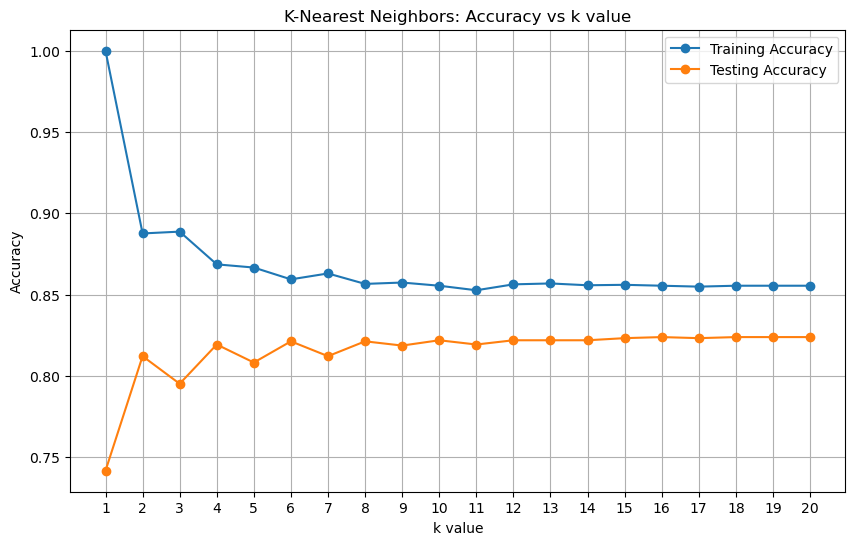

In [39]:
k_values = list(range(1, 21)) 

knn_train_acc_values = []
knn_test_acc_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, knn.predict(x_train))
    knn_train_acc_values.append(train_acc)
    test_acc = accuracy_score(y_test, knn.predict(x_test))
    knn_test_acc_values.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_train_acc_values, marker='o', label='Training Accuracy')
plt.plot(k_values, knn_test_acc_values, marker='o', label='Testing Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors: Accuracy vs k value')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


## Evaluating the Model

## Test data

In [40]:
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred=neigh.predict(x_test)
    print(accuracy_score(y_test.values, y_pred))


0.7416829745596869
0.812133072407045
0.7951728636660144
0.8193085453359426
0.8082191780821918
0.8212654924983692
0.812133072407045
0.8212654924983692
0.8186562296151337
0.821917808219178
0.8193085453359426
0.821917808219178
0.821917808219178
0.821917808219178
0.8232224396607958
0.8238747553816047
0.8232224396607958
0.8238747553816047
0.8238747553816047


## Training data

In [41]:
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_predc=neigh.predict(x_train)
    print(accuracy_score(y_train.values, y_predc))


1.0
0.887615320100643
0.8887335756220296
0.8686049762370702
0.8666480290746436
0.8593793681856304
0.863013698630137
0.8565837293821639
0.8574224210232038
0.8554654738607772
0.8526698350573106
0.8563041655018172
0.8568632932625104
0.8557450377411239
0.8560246016214705
0.8554654738607772
0.8549063461000839
0.8554654738607772
0.8554654738607772


## Confusion matrix for different k values

# Logistic Regression

## Training the model

In [42]:
clf = LogisticRegression(random_state=0,).fit(x_train,y_train)


## Evaluating the model

Text(95.72222222222221, 0.5, 'true')

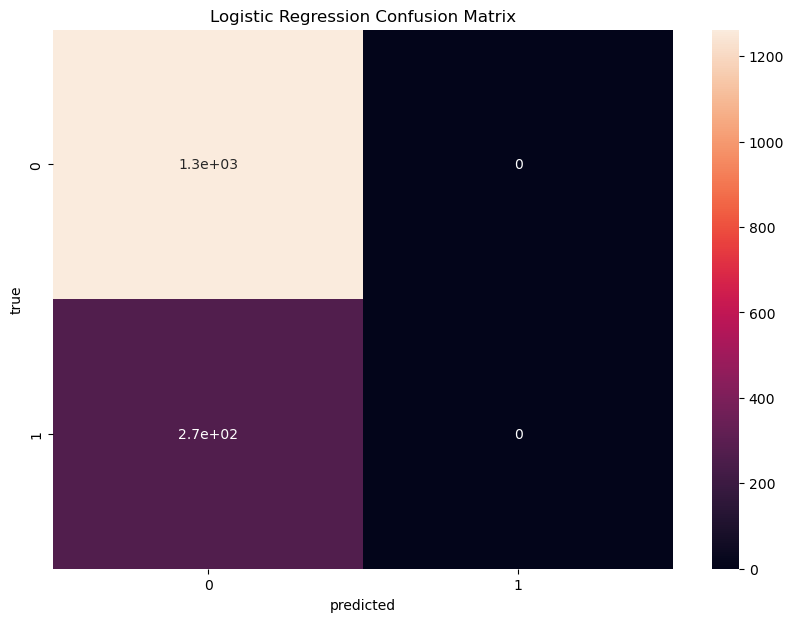

In [43]:
y_predl=clf.predict(x_test)
cm=confusion_matrix(y_test,y_predl)
plt.figure(figsize=(10,7))
plt.title('Logistic Regression Confusion Matrix')
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('true')


### Model Accuracy

In [44]:
accuracy_score(y_test.values, y_pred)


0.8238747553816047

## ROC Curve

/var/folders/fm/p1xhm_h901sbsy02szqjbk100000gn/T/ipykernel_1536/1664924413.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



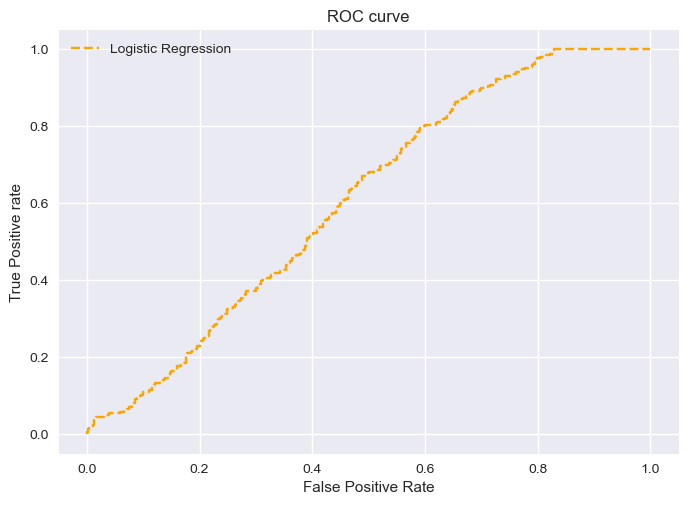

In [45]:
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
pred_prob=clf.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()


# AUC

In [46]:
x=roc_auc_score(y_test,pred_prob[:,1])
x


0.6080373798983632